In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import context
import hydro_utils as hutils

Read in data

In [5]:
# Station data (rel is for relating stage stations to stations in upstream watersheds)
stations_path = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\station_data\station_data.csv'
stations_rel_path = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\station_data\watershed_station_rel.csv'

stations_df = pd.read_csv(stations_path)
stage_stations_df = stations_df[stations_df['On_Major_River'] == 1]
stations_rel_df = pd.read_csv(stations_rel_path)

stage_stations_df

,Nombre,ID,Code,UTM_17_E,UTM_17_N,Elevación_pie,Elevación_m,Latitud_Norte,Longitud_Oeste,Tipo_de_Estación,Parámetros,Área_de_drenaje__km2_,Río_o_Lago_o_Mar,On_Major_River
9,Candelaria,CDL,51,662280,1037658,320.0,97.5,09 23 02.73,79 31 19.69,Pluviográfica / Fluviográfica,PFQQs,145.0,Pequení,1
11,Caño Quebrado Abajo,CQA,7,629055,995728,106.0,32.4,09 00 21.78,79 49 33.29,Fluviográfica,FQQs,68.2,Caño Quebrado,1
15,Chico,CHI,53,663699,1024320,340.0,104.0,09 15 48.37,79 30 35.03,Pluviográfica / Fluviográfica,PFQQs,407.0,Chagres,1
17,Ciento,CNT,52,637639,1028822,125.0,38.1,09 18 18.20,79 44 48.43,Pluviográfica / Fluviográfica,PFQQs,119.0,Gatún,1
22,El Chorro,CHR,48,610996,992291,140.0,42.7,08 58 31.63,79 59 24.99,Pluviográfica / Fluviográfica,PFQQs,171.0,Trinidad,1
34,Guarumal,GRM,13,662555,1017786,309.0,94.2,09 12 15.84,79 31 13.40,Fluviográfica,FQ,80.4,Indio Este,1
41,Los Cañones,CAN,18,602841,989044,340.0,104.0,08 56 46.62,80 03 52.31,Pluviográfica / Fluviográfica,PFQQs,192.0,Cirí Grande,1
46,Peluca,PEL,45,658016,1037392,350.0,107.0,09 22 54.65,79 33 39.49,Pluviográfica / Fluviográfica,PFQQs,90.6,Boquerón,1


In [6]:
# Hydro data
precip_path = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\precip_data\precip_15min.csv'
stage_path = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\stage_data\river_stage_par.csv'

precip_df = hutils.read_precip_data(precip_path, single_time_col=False)
stage_df = hutils.read_stage_data_og(stage_path, single_time_col=True)

Set time range and station

In [7]:
station_id = 'CNT'

year = 2024
start_date = pd.to_datetime(f"01-01-{year}", dayfirst=True)
end_date = pd.to_datetime(f"01-01-{year+1}", dayfirst=True)

In [8]:
precip_mask = (precip_df['Time'] >= start_date) & (precip_df['Time'] <= end_date) & (precip_df['Station Code'] == station_id)
clip_precip_df = precip_df[precip_mask]

stage_mask = (stage_df['Time'] >= start_date) & (stage_df['Time'] <= end_date) & (stage_df['Station Code'] == station_id)
clip_stage_df = stage_df[stage_mask]

Graph precip and stage for a station

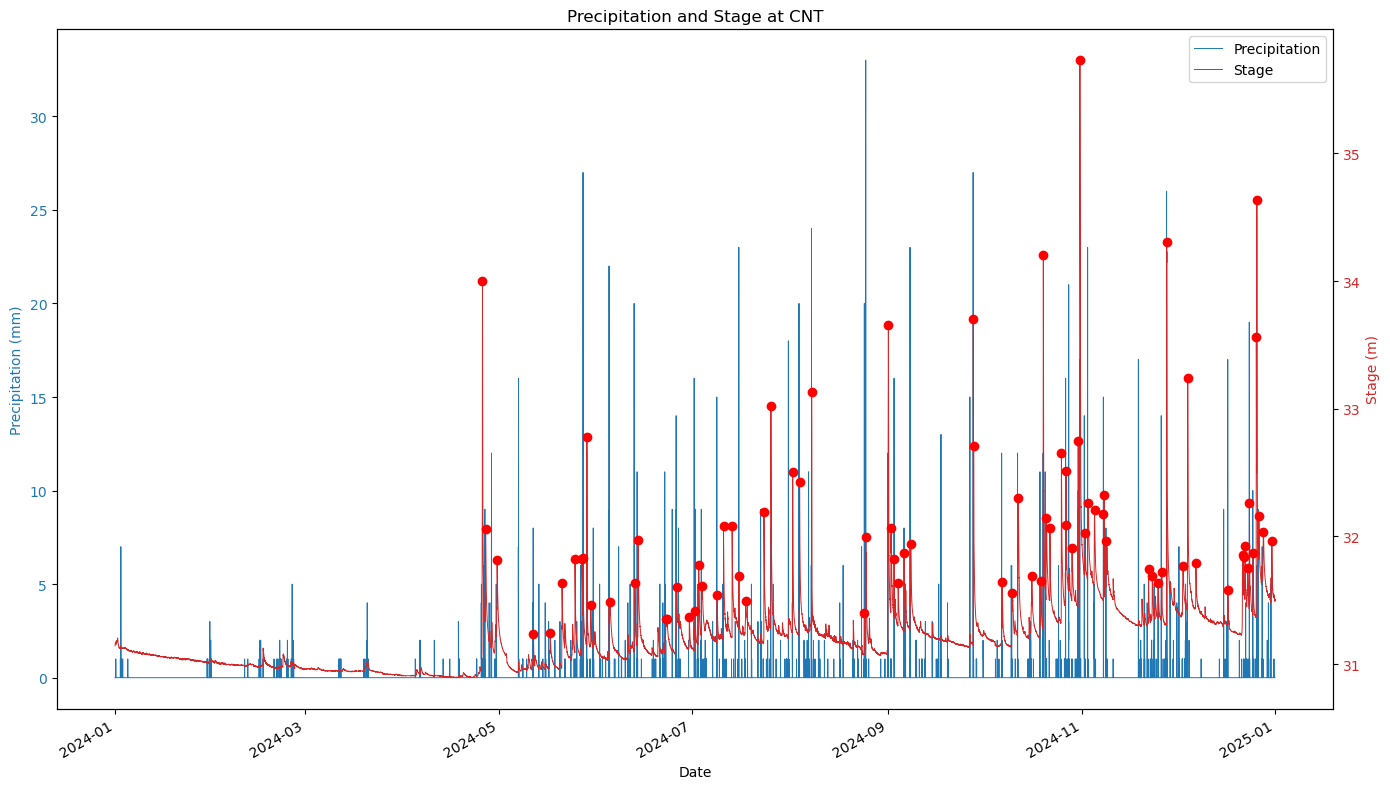

In [9]:
# Create the dual-axis plot
fig, precip_ax = plt.subplots(figsize=(14, 8))

# Plot precipitation data on left y-axis
color = 'tab:blue'
precip_ax.set_xlabel('Date')
precip_ax.set_ylabel('Precipitation (mm)', color=color)
precip_ax.plot(clip_precip_df['Time'], clip_precip_df['Value'], color=color, linewidth=0.7, label='Precipitation')
precip_ax.tick_params(axis='y', labelcolor=color)

# Create second y-axis for stage data
stage_ax = precip_ax.twinx()
color = 'tab:red'
stage_ax.set_ylabel('Stage (m)', color=color)
stage_ax.plot(clip_stage_df['Time'], clip_stage_df['Value'], color=color, linewidth=0.7, label='Stage')
stage_ax.tick_params(axis='y', labelcolor=color)

# Add local maxes
stage_peaks, _ = scipy.signal.find_peaks(clip_stage_df['Value'], prominence=0.25, distance=3)#height=82)
stage_ax.plot(clip_stage_df['Time'].iloc[stage_peaks], clip_stage_df['Value'].iloc[stage_peaks], 'ro')

# Create combined legend
lines1, labels1 = precip_ax.get_legend_handles_labels()
lines2, labels2 = stage_ax.get_legend_handles_labels()
stage_ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Add title
plt.title(f'Precipitation and Stage at {station_id}')

# Format the x-axis to show dates nicely
fig.autofmt_xdate()
plt.tight_layout()

# Show the plot
plt.show()

Blasphemy

In [10]:
peakspath = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\lag_data\lag_15min.csv'
peaks_df = pd.read_csv(peakspath, parse_dates=['StageTime', 'PrecipTime'])
peaks_df

,StageTime,StageStation,StageValue,PrecipTime,PrecipStation,PrecipValue
0,2015-05-25 14:09:36,CNT,3.594104,2015-05-25 09:45:00,CNT,3.0
1,2015-06-05 01:42:15,CNT,0.459535,2015-06-04 19:00:00,CNT,3.0
2,2015-06-08 22:52:30,CNT,2.001843,2015-06-08 19:30:00,CNT,2.0
3,2015-07-07 18:53:22,CNT,0.028687,2015-07-07 08:15:00,CNT,5.0
4,2015-07-08 06:26:06,CNT,1.040242,2015-07-07 20:45:00,CNT,2.0
...,...,...,...,...,...,...
3162,2024-11-24 15:15:00,CAN,1.239454,2024-11-24 09:15:00,CAN,5.0
3163,2024-11-28 03:30:00,CAN,10.668291,2024-11-27 19:15:00,CAN,13.0
3164,2024-11-30 02:45:00,CAN,5.913578,2024-11-29 22:00:00,CAN,12.0
3165,2024-12-30 03:00:00,CAN,6.209069,2024-12-29 17:15:00,CAN,2.0


In [11]:
peaks_mask = (peaks_df['StageTime'] >= start_date) & (peaks_df['StageTime'] <= end_date) & (peaks_df['StageStation'] == station_id)
clip_peaks_df = peaks_df[peaks_mask]

(np.float64(19704.7), np.float64(20107.3)) (np.float64(-1.6500000000000001), np.float64(34.65))
(np.float64(19704.7), np.float64(20107.3)) (np.float64(-1.428492422419533), np.float64(37.498044020115216))


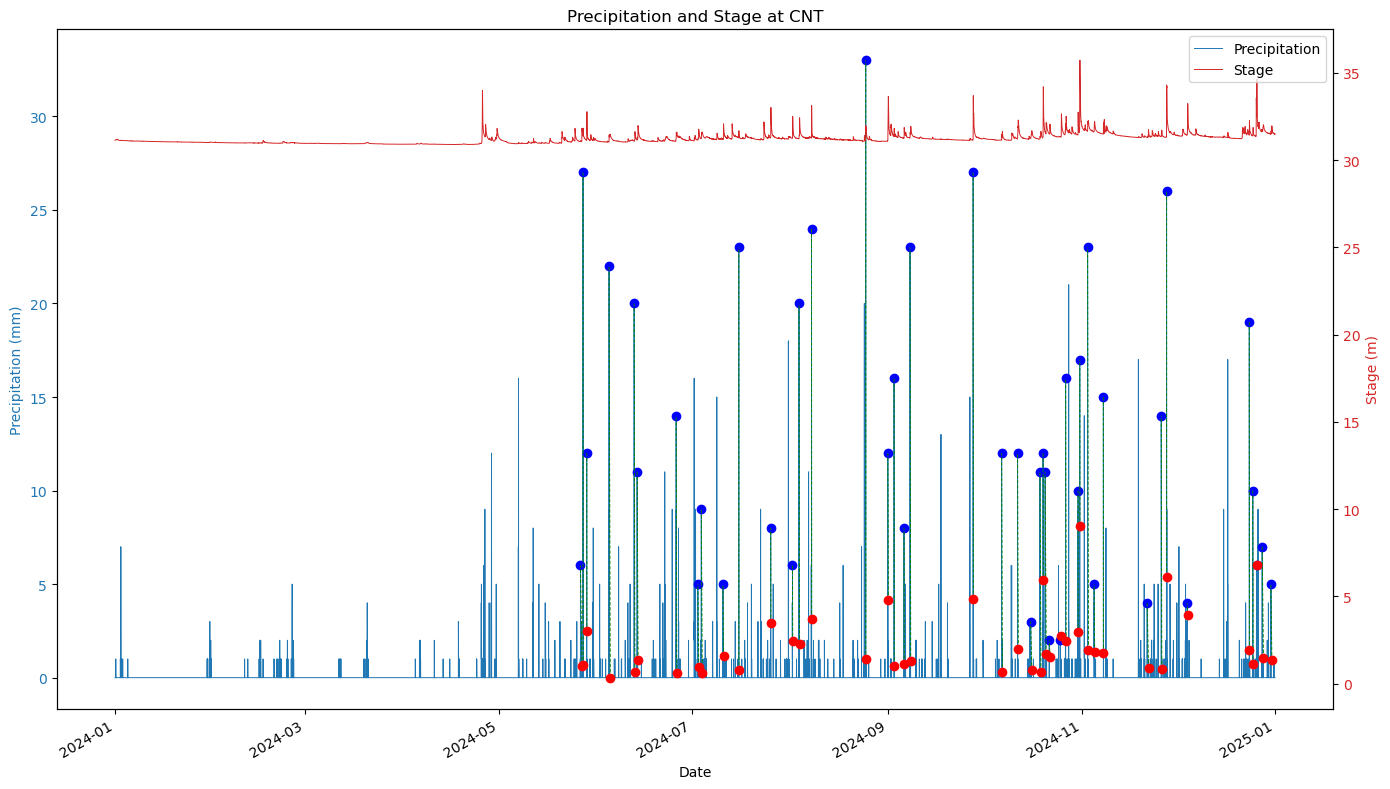

In [12]:
import matplotlib.dates as mdates

# Create the dual-axis plot
fig, precip_ax = plt.subplots(figsize=(14, 8))

# Plot precipitation data on left y-axis
color = 'tab:blue'
precip_ax.set_xlabel('Date')
precip_ax.set_ylabel('Precipitation (mm)', color=color)
precip_ax.plot(clip_precip_df['Time'], clip_precip_df['Value'], color=color, linewidth=0.7, label='Precipitation')
precip_ax.tick_params(axis='y', labelcolor=color)

# Create second y-axis for stage data
stage_ax = precip_ax.twinx()
color = 'tab:red'
stage_ax.set_ylabel('Stage (m)', color=color)
stage_ax.plot(clip_stage_df['Time'], clip_stage_df['Value'], color=color, linewidth=0.7, label='Stage')
stage_ax.tick_params(axis='y', labelcolor=color)

# Plot peaks points
stage_ax.plot(clip_peaks_df['StageTime'], clip_peaks_df['StageValue'], 'ro')
precip_ax.plot(clip_peaks_df['PrecipTime'], clip_peaks_df['PrecipValue'], 'bo')

# Force pyplot to recalculate the limits, which is necessary for the next step
print(precip_ax.get_xlim(), precip_ax.get_ylim())
print(stage_ax.get_xlim(), stage_ax.get_ylim())

# Connect associated peaks with lines
for row in clip_peaks_df.itertuples():
    # Convert to axis coordinates
    stage_display = stage_ax.transLimits.transform(
        (mdates.date2num(row.StageTime), row.StageValue)
    )
    precip_display = precip_ax.transLimits.transform(
        (mdates.date2num(row.PrecipTime), row.PrecipValue)
    )

    # Convert back to precip_ax data coordinates
    # I realize doing these steps for stage is redundant, but it illustrates the process
    stage_ax1 = precip_ax.transLimits.inverted().transform(stage_display)
    precip_ax1 = precip_ax.transLimits.inverted().transform(precip_display)

    xs = [stage_ax1[0], precip_ax1[0]]
    ys = [stage_ax1[1], precip_ax1[1]]

    precip_ax.plot(xs, ys, 'g--', linewidth=0.7)

# Create combined legend
lines1, labels1 = precip_ax.get_legend_handles_labels()
lines2, labels2 = stage_ax.get_legend_handles_labels()
stage_ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Add title
plt.title(f'Precipitation and Stage at {station_id}')

# Format the x-axis to show dates nicely
fig.autofmt_xdate()
plt.tight_layout()

# Show the plot
plt.show()

Exploratory statistics on lag times

In [13]:
import numpy as np


lag_df = peaks_df.copy()
lag_df['Lag'] = lag_df['StageTime'] - lag_df['PrecipTime']
lag_df['Lag'] = lag_df['Lag'] / np.timedelta64(1, 'h') #convert to hours

lag_df

,StageTime,StageStation,StageValue,PrecipTime,PrecipStation,PrecipValue,Lag
0,2015-05-25 14:09:36,CNT,3.594104,2015-05-25 09:45:00,CNT,3.0,4.410000
1,2015-06-05 01:42:15,CNT,0.459535,2015-06-04 19:00:00,CNT,3.0,6.704167
2,2015-06-08 22:52:30,CNT,2.001843,2015-06-08 19:30:00,CNT,2.0,3.375000
3,2015-07-07 18:53:22,CNT,0.028687,2015-07-07 08:15:00,CNT,5.0,10.639444
4,2015-07-08 06:26:06,CNT,1.040242,2015-07-07 20:45:00,CNT,2.0,9.685000
...,...,...,...,...,...,...,...
3162,2024-11-24 15:15:00,CAN,1.239454,2024-11-24 09:15:00,CAN,5.0,6.000000
3163,2024-11-28 03:30:00,CAN,10.668291,2024-11-27 19:15:00,CAN,13.0,8.250000
3164,2024-11-30 02:45:00,CAN,5.913578,2024-11-29 22:00:00,CAN,12.0,4.750000
3165,2024-12-30 03:00:00,CAN,6.209069,2024-12-29 17:15:00,CAN,2.0,9.750000


In [14]:
lag_df_slice = lag_df[lag_df['PrecipValue'] > 10]

lag_gb = lag_df.groupby([lag_df['StageTime'].dt.year.rename('year'), lag_df['StageStation']])
yearly_lag_means = lag_gb['Lag'].mean().reset_index()
yearly_lag_std = lag_gb['Lag'].std().reset_index()

yearly_lag_means.rename(columns={'Lag': 'LagMean'}, inplace=True)
yearly_lag_std.rename(columns={'Lag': 'LagStd'}, inplace=True)

yearly_lag_data = pd.merge(yearly_lag_means, yearly_lag_std, on=['year', 'StageStation'])

yearly_lag_data

,year,StageStation,LagMean,LagStd
0,2014,CDL,2.645231,2.116367
1,2014,PEL,2.788178,1.816279
2,2015,CAN,5.871622,2.559447
3,2015,CDL,2.972047,2.395929
4,2015,CHR,4.609925,3.189290
...,...,...,...,...
65,2024,CHR,3.661290,2.511489
66,2024,CNT,4.426136,3.085308
67,2024,CQA,3.734694,2.327602
68,2024,GRM,3.331474,1.768634


In [15]:
type(yearly_lag_means)
print(yearly_lag_means.index)
stations = lag_df['StageStation'].unique().tolist()
stations

RangeIndex(start=0, stop=70, step=1)


['CNT', 'PEL', 'CDL', 'GRM', 'CHI', 'CQA', 'CHR', 'CAN']

C:\Users\ianma\AppData\Local\Temp\ipykernel_29276\1870393541.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


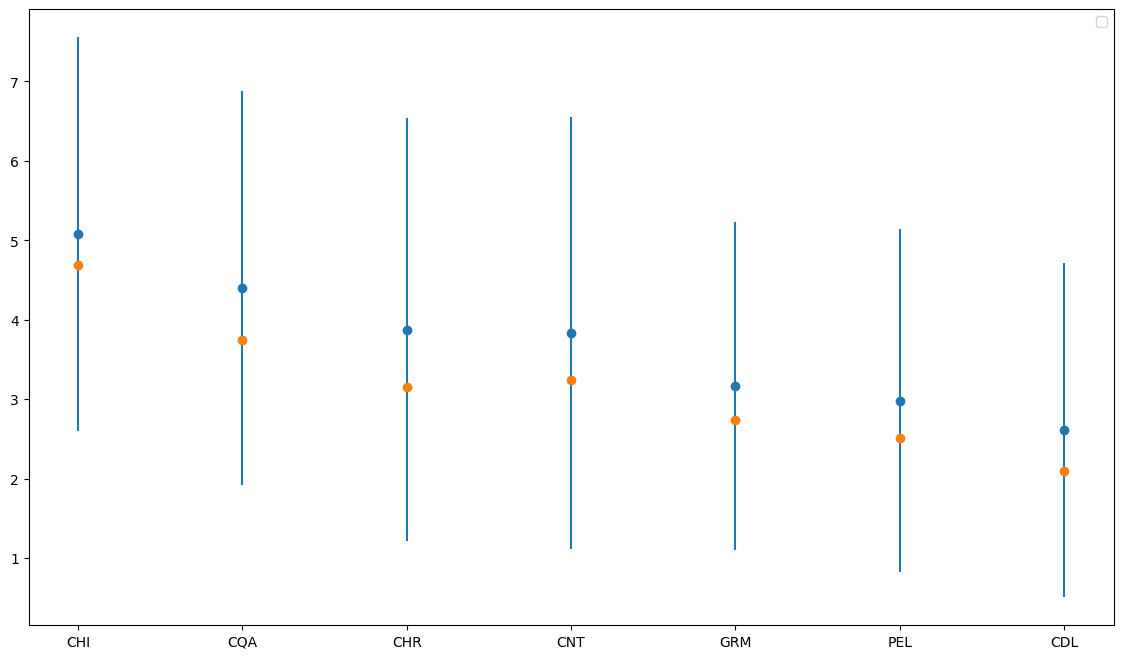

In [16]:
lag_df_slice = lag_df[(lag_df['StageStation']!='CAN')]
lag_station_gb = lag_df_slice.groupby(lag_df_slice['StageStation'])
full_lag_means = lag_station_gb['Lag'].mean().reset_index().rename(columns={'Lag': 'LagMean'})
full_lag_std = lag_station_gb['Lag'].std().reset_index().rename(columns={'Lag': 'LagStd'})
full_lag_med = lag_station_gb['Lag'].median().reset_index().rename(columns={'Lag': 'LagMed'})
full_lag_data = pd.merge(full_lag_means, full_lag_std, on='StageStation')
full_lag_data = pd.merge(full_lag_data, full_lag_med, on='StageStation')

full_lag_data.sort_values(by='LagMean', ascending=False, inplace=True)


fig, ax = plt.subplots(figsize=(14, 8))
ax.errorbar(full_lag_data['StageStation'], full_lag_data['LagMean'], full_lag_data['LagStd'], None, 'o')
ax.plot(full_lag_data['StageStation'], full_lag_data['LagMed'], 'o')

ax.legend()
plt.show()

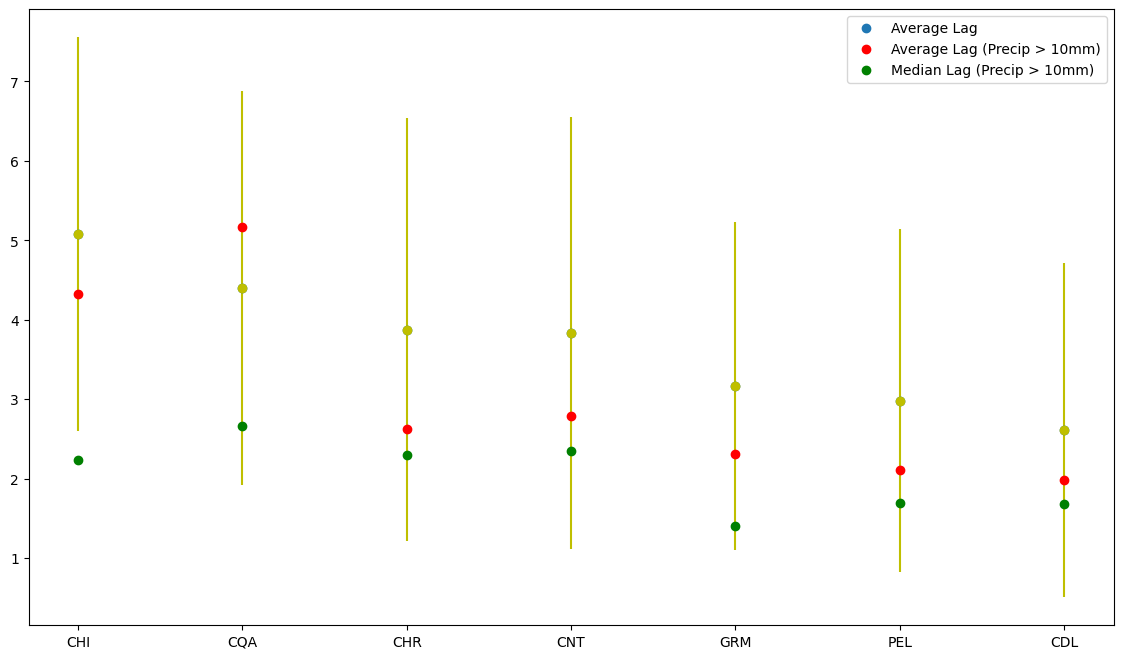

In [17]:
lag_df_large_precip = lag_df[(lag_df['PrecipValue'] > 10)&(lag_df['StageStation']!='CAN')]

lag_station_gb = lag_df_large_precip.groupby(lag_df_large_precip['StageStation'])
full_lag_means = lag_station_gb['Lag'].mean().reset_index().rename(columns={'Lag': 'LagMean'})
full_lag_std = lag_station_gb['Lag'].std().reset_index().rename(columns={'Lag': 'LagStd'})
full_lag_med = lag_station_gb['Lag'].std().reset_index().rename(columns={'Lag': 'LagMed'})
full_lag_data_large_precip = pd.merge(full_lag_means, full_lag_std, on='StageStation')
full_lag_data_large_precip = pd.merge(full_lag_data_large_precip, full_lag_med, on='StageStation')

full_lag_data_large_precip.sort_values(by='LagMean', ascending=False, inplace=True)


fig, ax = plt.subplots(figsize=(14, 8))
#ax.bar(full_lag_data['StageStation'], full_lag_data['LagMean'], label="Average Lag")
#ax.bar(full_lag_data_large_precip['StageStation'], full_lag_data_large_precip['LagMean'], label="Average Lag (Precip > 10mm)")
ax.errorbar(full_lag_data['StageStation'], full_lag_data['LagMean'], full_lag_data['LagStd'], None, 'oy')
#ax.errorbar(full_lag_data_large_precip['StageStation'], full_lag_data_large_precip['LagMean'], full_lag_data_large_precip['LagStd'], None, 'or')
ax.plot(full_lag_data['StageStation'], full_lag_data['LagMean'], 'o', label="Average Lag")
ax.plot(full_lag_data_large_precip['StageStation'], full_lag_data_large_precip['LagMean'], 'or', label="Average Lag (Precip > 10mm)")
ax.plot(full_lag_data_large_precip['StageStation'], full_lag_data_large_precip['LagMed'], 'og', label="Median Lag (Precip > 10mm)")

ax.legend()
plt.show()

In [24]:
norm_stage_path = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\stage_data\river_stage_par_norm.csv'

norm_stage_df = hutils.read_stage_data_norm(norm_stage_path)

precip_df

,Time,Station Code,Sensor,Data Type,Value
0,2014-01-01 00:15:00,CHI,Precipitation.Telemetria,Total (mm),0.0
1,2014-01-01 00:30:00,CHI,Precipitation.Telemetria,Total (mm),0.0
2,2014-01-01 00:45:00,CHI,Precipitation.Telemetria,Total (mm),0.0
3,2014-01-01 01:00:00,CHI,Precipitation.Telemetria,Total (mm),0.0
4,2014-01-01 01:15:00,CHI,Precipitation.Telemetria,Total (mm),0.0
...,...,...,...,...,...
3118395,2025-04-19 23:00:00,ARC,Precipitation.Telemetria,Total (mm),0.0
3118396,2025-04-19 23:15:00,ARC,Precipitation.Telemetria,Total (mm),0.0
3118397,2025-04-19 23:30:00,ARC,Precipitation.Telemetria,Total (mm),0.0
3118398,2025-04-19 23:45:00,ARC,Precipitation.Telemetria,Total (mm),0.0


In [25]:
station = 'CNT'

station_precip_df = precip_df.rename(columns={'End': 'Time'})
station_precip_df = station_precip_df[station_precip_df['Station Code'] == station]

station_stage_df = stage_df.rename(columns={'End': 'Time'})
station_stage_df = station_stage_df[station_stage_df['Station Code'] == station]

station_norm_stage_df = norm_stage_df[norm_stage_df['Station Code'] == station]

year = 2024
start_date = pd.to_datetime(f"01-01-{year}", dayfirst=True)
end_date = pd.to_datetime(f"01-01-{year+1}", dayfirst=True)

station_precip_mask = (station_precip_df['Time'] >= start_date) & (station_precip_df['Time'] <= end_date)
clip_station_precip_df = station_precip_df[station_precip_mask]

station_stage_mask = (station_stage_df['Time'] >= start_date) & (station_stage_df['Time'] <= end_date)
clip_station_stage_df = station_stage_df[station_stage_mask]

station_norm_stage_mask = (station_norm_stage_df['Time'] >= start_date) & (station_norm_stage_df['Time'] <= end_date)
clip_station_norm_stage_df = station_norm_stage_df[station_norm_stage_mask]


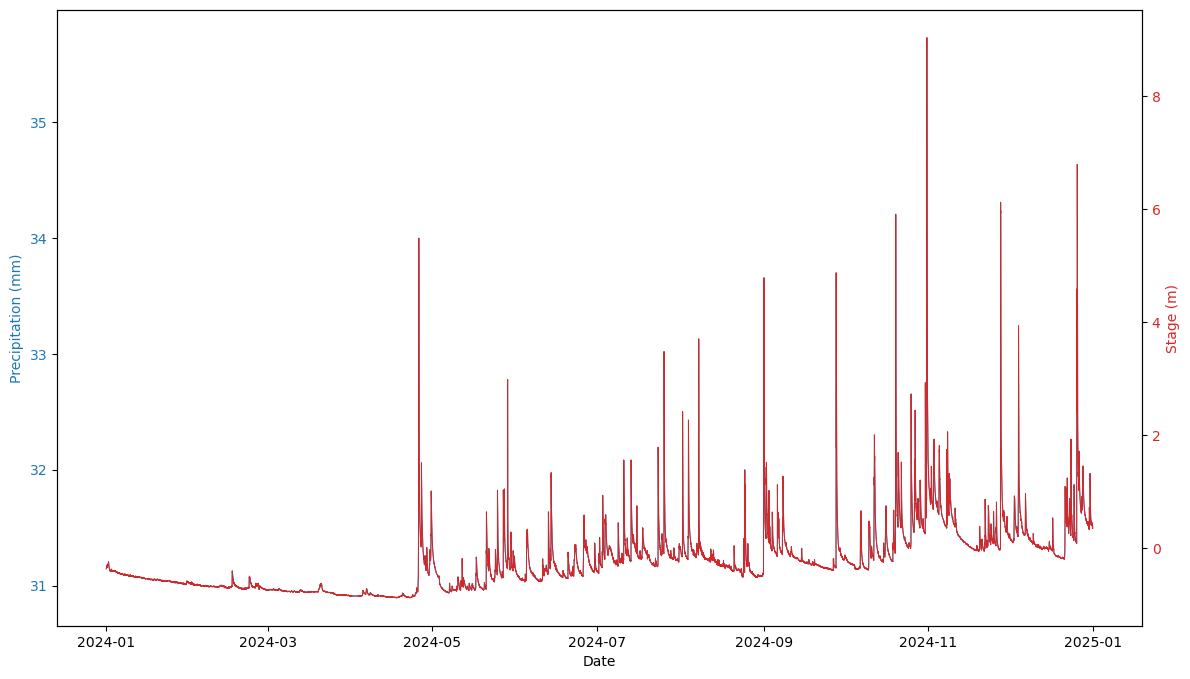

In [26]:
fig, precip_ax = plt.subplots(figsize=(14, 8))

# Plot precipitation data on left y-axis
color = 'tab:blue'
precip_ax.set_xlabel('Date')
precip_ax.set_ylabel('Precipitation (mm)', color=color)
precip_ax.plot(clip_station_stage_df['Time'], clip_station_stage_df['Value'], color=color, linewidth=0.7, label='Precipitation')
precip_ax.tick_params(axis='y', labelcolor=color)

# Create second y-axis for stage data
stage_ax = precip_ax.twinx()
color = 'tab:red'
stage_ax.set_ylabel('Stage (m)', color=color)
stage_ax.plot(clip_station_norm_stage_df['Time'], clip_station_norm_stage_df['Value'], color=color, linewidth=0.7, label='Stage')
stage_ax.tick_params(axis='y', labelcolor=color)

